# <center><font color='red'><b>JanataHack: Computer Vision Hackathon</b></font></center>

___

<center>15 Day Hackathon From Analytics Vidhya</center>

<center><img src="https://datahack-prod.s3.ap-south-1.amazonaws.com/__sized__/contest_cover/cover_FJJYomD-thumbnail-1200x1200-90.jpg"/>

## About the Hackathon

__Fatalities__ due to traffic delays of emergency vehicles such as __ambulance & fire brigade__ is a huge problem. In daily life, we often see that emergency vehicles face difficulty in passing through traffic. So differentiating a vehicle into an emergency and non emergency category can be an important component in __traffic monitoring__ as well as self drive car systems as reaching on time to their destination is critical for these services.

______

## Task 

In this problem, you will be working on __classifying vehicle images__ as either belonging to the ```emergency vehicle or non-emergency vehicle category```. 

- For the same, you are provided with the __train__ and the __test dataset__. Emergency vehicles usually includes ```police cars, ambulance and fire brigades```.

## Sample Images

<center><img src="https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/08/Emgen.jpg"/></center>

## Data Description
- ```train.zip```: contains 2 csvs and 1 folder containing image data
- ```train.csv``` – [‘image_names’, ‘emergency_or_not’] contains the image name and correct class for 1646 (70%) train images.

- ```images``` – contains __2352__ images for both train and test sets

- ```test.csv```: [‘image_names’] contains just the image names for the 706 (30%) test images

- ```sample_submission.csv```: [‘image_names’,’emergency_or_not­’] contains the exact format for a valid submission (1 - For Emergency Vehicle, 0 - For Non Emergency Vehicle)

## Evaluation Metric
- The evaluation metric for this competition is ```Accuracy```.

## Importing the necessary libraries

In [ ]:
# To print multiple output in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from google.colab.patches import cv2_imshow

In [ ]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# File system manangement
import cv2
import sys
import os
import copy
import shutil

# Get filenames in list
from os import listdir
from os.path import isfile, join

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

import time

In [ ]:
# ! pip install tqdm
from tqdm import tqdm



Read the train and test data

- As the train folder is zipped one so let's first unzip it and then read the file

In [ ]:
# unzip the train folder
!unzip "/content/drive/My Drive/AVCompetition /JanataHack: Computer Vision Hackathon/train.zip"

Archive:  /content/drive/My Drive/AVCompetition /JanataHack: Computer Vision Hackathon/train.zip
replace images/0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

Unzip train folder creates two new folder. 
- Images
- train.csv

In [ ]:
# read the both csv file train and test

train=pd.read_csv('/content/train.csv')
test=pd.read_csv('/content/drive/My Drive/AVCompetition /JanataHack: Computer Vision Hackathon/test.csv')


In [ ]:
train.head()
test.head()
train.shape
test.shape

,image_names,emergency_or_not
0,1503.jpg,0
1,1420.jpg,0
2,1764.jpg,0
3,1356.jpg,0
4,1117.jpg,0


,image_names
0,1960.jpg
1,668.jpg
2,2082.jpg
3,808.jpg
4,1907.jpg


(1646, 2)

(706, 1)

In [ ]:
path="/content/images"
print(listdir(path))

['1668.jpg', '706.jpg', '1711.jpg', '591.jpg', '1449.jpg', '1313.jpg', '2274.jpg', '1514.jpg', '1094.jpg', '847.jpg', '472.jpg', '489.jpg', '1005.jpg', '1415.jpg', '1176.jpg', '664.jpg', '859.jpg', '384.jpg', '1254.jpg', '2104.jpg', '2308.jpg', '954.jpg', '1422.jpg', '486.jpg', '1494.jpg', '894.jpg', '428.jpg', '1866.jpg', '26.jpg', '1031.jpg', '1123.jpg', '735.jpg', '878.jpg', '1594.jpg', '1061.jpg', '1337.jpg', '1410.jpg', '904.jpg', '2186.jpg', '480.jpg', '756.jpg', '1226.jpg', '1007.jpg', '156.jpg', '2163.jpg', '1773.jpg', '2192.jpg', '1489.jpg', '1197.jpg', '833.jpg', '1476.jpg', '1040.jpg', '974.jpg', '1085.jpg', '165.jpg', '1601.jpg', '2350.jpg', '2162.jpg', '1132.jpg', '7.jpg', '523.jpg', '199.jpg', '1098.jpg', '1257.jpg', '1742.jpg', '407.jpg', '2079.jpg', '846.jpg', '2031.jpg', '650.jpg', '314.jpg', '1217.jpg', '2249.jpg', '2127.jpg', '945.jpg', '147.jpg', '1584.jpg', '541.jpg', '1556.jpg', '1683.jpg', '741.jpg', '841.jpg', '2037.jpg', '516.jpg', '163.jpg', '1789.jpg', '1363.

In [ ]:
train['emergency_or_not'].value_counts()

0    965
1    681
Name: emergency_or_not, dtype: int64

- Can clearly see there is an imbalance in the both clases

## In this Section of code we gonna duplicate a set of 150 image of class='1' 

Choose a random sample of 150 images

In [ ]:
dupli=train[train['emergency_or_not']==1].sample(150)

In [ ]:
dupli.shape
dupli.head(4)

(150, 2)

,image_names,emergency_or_not
569,288.jpg,1
1295,119.jpg,1
928,255.jpg,1
944,501.jpg,1


### Number of images before and shape of training data before.

In [ ]:
# path="/content/images"
print(train.shape)
len(listdir(path))

(1646, 2)


2352

### Creating duplicate images

In [ ]:

for i in dupli['image_names']:
  new_image='copy'+i

  original_img = cv2.imread("/content/images/"+i)
  clone_img = copy.copy(original_img)
  cv2.imwrite('/content/images/'+ new_image,clone_img)

  d=[{'image_names':new_image,'emergency_or_not':1}]

  train=train.append(d,ignore_index=True,sort=False)


True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

### Number of images before and shape of training data after.

In [ ]:
print(train.shape)
len(listdir(path))

(1796, 2)


2502

So here you can check the images in training data increased to 1796 and number of images increased to 2502

In [ ]:
train['emergency_or_not'].value_counts()

0    965
1    831
Name: emergency_or_not, dtype: int64

In [ ]:
## Loading our images

file_names = [f for f in listdir(path) if isfile(join(path, f))]

print(str(len(file_names)) + ' images loaded')

2502 images loaded


In [ ]:
total=train.shape[0]+test.shape[0]
print(total)

2502


In [ ]:
test_image = "./test/test_images/"

train_image="./train/train_images/"

valid_image="./train/valid_images/"

Model_file='./saved_model/'

# training_size=1300
# validation_size=336

size=224

In [ ]:
def make_dir(directory):
        if os.path.exists(directory):
            shutil.rmtree(directory)
        os.makedirs(directory)

        
# test_image
make_dir(test_image)

# train_image
make_dir(train_image)

# valid_image
# train_image
make_dir(valid_image)


make_dir(Model_file)

In [ ]:
training_images=[]
test_images=[]
evaluation_images=[]

In [ ]:
# Store all test images in the test_image directory and resize the image to 150*150

for i in test.image_names.values:
  image=cv2.imread(path+'/'+i)
  img = cv2.resize(image, (size, size), interpolation = cv2.INTER_AREA)
  test_images.append(img)
  cv2.imwrite(os.path.join(test_image,i),img)

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

In [ ]:
training_label=[]


# Store all test images in the test_image directory and resize the image to 150*150
for i in train[:1400].image_names.values: 
  # grab the label attatched to the image
  value=train[train['image_names']==i]['emergency_or_not'].item()
  training_label.append(value)
  image=cv2.imread(path+'/'+i)
  img = cv2.resize(image, (size, size), interpolation = cv2.INTER_AREA)
  training_images.append(img)
  cv2.imwrite(os.path.join(train_image,i),img)


True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

In [ ]:
# for validation data
validation_label=[]

for i in train[1400:].image_names.values: 
  # grab the label attatched to the image
  value=train[train['image_names']==i]['emergency_or_not'].item()
  validation_label.append(value)
  image=cv2.imread(path+'/'+i)
  img = cv2.resize(image, (size, size), interpolation = cv2.INTER_AREA)
  evaluation_images.append(img)
  cv2.imwrite(os.path.join(valid_image,i),img)

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

In [ ]:
# len(listdir('/content/test_images'))
print(len(listdir(test_image)))

print(len(listdir(train_image)))

print(len(listdir(valid_image)))

706
1400
396


In [ ]:
TRAIN_PATH='/content/train/train_images'

VALID_PATH='/content/train/valid_images'

TEST_PATH='/content/test/test_images'

### For Train Images

In [ ]:
def read_img(img_path):
    img = cv2.imread(img_path)
    return img

train_img = []
for img_path in tqdm(train['image_names'][:1400].values):
  
    train_img.append(read_img(TRAIN_PATH +'/'+ img_path))

100%|██████████| 1400/1400 [00:01<00:00, 922.92it/s]


In [ ]:
# train_img[0]/255

In [ ]:
x_train = np.array(train_img, np.float32) / 255

In [ ]:
# plt.imshow(train_img[0])

In [ ]:
#Mean of the images

mean_img = np.mean(x_train, axis=0)
# plt.imshow(mean_img)
#Standard deviation of the images

std_img = np.std(x_train, axis=0)
# plt.imshow(std_img)

In [ ]:
#Normalization
x_train_norm = (x_train - mean_img) / std_img
x_train_norm.shape

(1400, 224, 224, 3)

In [ ]:
class_ = train['emergency_or_not'][:1400].tolist()
print(class_)


[0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 

In [ ]:
class_list = train['emergency_or_not'][:1400].tolist()
Y_train = {k:v for v,k in enumerate(set(class_list))}
y_train = [Y_train[k] for k in class_list]

In [ ]:
set(y_train)

{0, 1}

In [ ]:
# print(len(y_train))

# y_train[0]

In [ ]:
#One-hot encoding the target variable.

from keras.utils import to_categorical
y_train = to_categorical(y_train,2)
y_train.shape

Using TensorFlow backend.


(1400, 2)

In [ ]:
y_train[1]

array([1., 0.], dtype=float32)

### For validation data

In [ ]:
valid_img = []
for img_path in tqdm(train['image_names'][1400:].values):
  
    valid_img.append(read_img(VALID_PATH +'/'+ img_path))

100%|██████████| 396/396 [00:00<00:00, 992.58it/s]


In [ ]:
x_valid = np.array(valid_img, np.float32) / 255

In [ ]:
#Normalization
x_valid_norm = (x_valid - mean_img) / std_img
x_valid_norm.shape

(396, 224, 224, 3)

In [ ]:
class_list = train['emergency_or_not'][1400:].tolist()
Y_valid = {k:v for v,k in enumerate(set(class_list))}
y_valid = [Y_valid[k] for k in class_list]

In [ ]:
y_valid = to_categorical(y_valid,num_classes=2)

In [ ]:
y_valid.shape

(396, 2)

### For Test Data

In [ ]:
#Now that we have built and trained our model, it is time to predict the test data.

test_img = []
for img in tqdm(test['image_names'].values):
    test_img.append(read_img(TEST_PATH +'/'+ img))


100%|██████████| 706/706 [00:00<00:00, 981.23it/s]


In [ ]:
#Applying the same data-preprocessing steps on the test data.
x_test = np.array(test_img, np.float32) / 255

In [ ]:
x_test_norm = (x_test - mean_img) / std_img
x_test_norm.shape

(706, 224, 224, 3)

### Data Augmentation

In [ ]:
x_train.shape
x_valid.shape
x_test.shape

(1400, 224, 224, 3)

(396, 224, 224, 3)

(706, 224, 224, 3)

In [ ]:
# Change datatype to float32
x_train = x_train.astype('float32')
x_valid=x_valid.astype('float32')
x_test = x_test.astype('float32')

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# define data preparation
train_datagen = ImageDataGenerator(
        rotation_range=45,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

In [ ]:
# fit parameters from data
train_datagen.fit(x_train)

#batch_size-16,32,64

train_generator =train_datagen.flow(x_train_norm, y_train, batch_size=32,shuffle=True)

In [ ]:
validation_datagen = ImageDataGenerator()
validation_datagen.fit(x_valid)

validation_generator =validation_datagen.flow(x_valid_norm, y_valid, batch_size=9,shuffle=False)

In [ ]:
# test_generator=test_datagen.flow()
# test_generator=test_generator.flow(x_test,batch_size=9,shuffle=False)

## Transfer leanring model building 

In [ ]:
from keras.applications import MobileNet

# MobileNet was designed to work on 224 x 224 pixel input images sizes
img_rows, img_cols = 224, 224 

# Re-loads the MobileNet model without the top or FC layers
MobileNet = MobileNet(weights = 'imagenet', 
                 include_top = False, 
                 input_shape = (img_rows, img_cols, 3))

# Here we freeze the last 4 layers 
# Layers are set to trainable as True by default
for layer in MobileNet.layers:
    layer.trainable = False
    
# Let's print our layers 
for (i,layer) in enumerate(MobileNet.layers):
    print(str(i) + " "+ layer.__class__.__name__, layer.trainable)

0 InputLayer False
1 ZeroPadding2D False
2 Conv2D False
3 BatchNormalization False
4 ReLU False
5 DepthwiseConv2D False
6 BatchNormalization False
7 ReLU False
8 Conv2D False
9 BatchNormalization False
10 ReLU False
11 ZeroPadding2D False
12 DepthwiseConv2D False
13 BatchNormalization False
14 ReLU False
15 Conv2D False
16 BatchNormalization False
17 ReLU False
18 DepthwiseConv2D False
19 BatchNormalization False
20 ReLU False
21 Conv2D False
22 BatchNormalization False
23 ReLU False
24 ZeroPadding2D False
25 DepthwiseConv2D False
26 BatchNormalization False
27 ReLU False
28 Conv2D False
29 BatchNormalization False
30 ReLU False
31 DepthwiseConv2D False
32 BatchNormalization False
33 ReLU False
34 Conv2D False
35 BatchNormalization False
36 ReLU False
37 ZeroPadding2D False
38 DepthwiseConv2D False
39 BatchNormalization False
40 ReLU False
41 Conv2D False
42 BatchNormalization False
43 ReLU False
44 DepthwiseConv2D False
45 BatchNormalization False
46 ReLU False
47 Conv2D False
48 Batc

## Let's make a function that returns our FC Head

In [ ]:
# give rise to best accuracy
def addTopModelMobileNet(bottom_model, num_classes):
    """creates the top or head of the model that will be 
    placed ontop of the bottom layers"""

    top_model = bottom_model.output
    top_model = GlobalAveragePooling2D()(top_model)


    top_model = Dense(1024,activation='relu')(top_model)
    top_model = Dropout(0.5)(top_model)


    top_model = Dense(1024,activation='relu')(top_model)
    top_model = Dropout(0.5)(top_model)
    # top_model = Dropout(0.8)(top_model) 
    # # newly added dense layer
    # top_model = Dense(1024,activation='relu')(top_model)
    # top_model = Dropout(0.5)(top_model)

    # top_model = Dense(1024,activation='relu')(top_model)
    # top_model = Dropout(0.5)(top_model)

    # top_model = Dense(1024,activation='relu')(top_model)
    # top_model = Dropout(0.5)(top_model)

    # till here
    top_model = Dense(512,activation='relu')(top_model)
    top_model = Dense(num_classes,activation='softmax')(top_model)
    return top_model

## Let's add our FC Head back onto MobileNet

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D,MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.models import Model

# Set our class number to 3 (Young, Middle, Old)
num_classes = 2

FC_Head = addTopModelMobileNet(MobileNet, num_classes)

model = Model(inputs = MobileNet.input, outputs = FC_Head)

print(model.summary())

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128 

In [ ]:
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint, EarlyStopping

                     
checkpoint = ModelCheckpoint("/content/saved_model/monkey_breed_mobileNet.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

earlystop = EarlyStopping(monitor = 'val_loss', 
                          min_delta = 0, 
                          patience = 5,
                          verbose = 1,
                          restore_best_weights = True)

# we put our call backs into a callback list
callbacks = [earlystop, checkpoint]

# We use a very small learning rate 
model.compile(loss = 'categorical_crossentropy',
              optimizer = RMSprop(lr = 0.0001),
              metrics = ['accuracy'])

In [ ]:
batch_size = 16

In [ ]:
#Training the model for 10 epochs.
ts=time.time()


model_history=model.fit_generator(
        train_generator,
        steps_per_epoch=2000 // batch_size,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=800 // batch_size,
        callbacks=callbacks)


timetaken=time.time()-ts

print('Time required to train the model is {} mins'.format(timetaken/60))

Epoch 1/50
125/125 [==============================] - 51s 407ms/step - loss: 0.5022 - accuracy: 0.7548 - val_loss: 0.2302 - val_accuracy: 0.8289

Epoch 00001: val_loss improved from inf to 0.23025, saving model to /content/saved_model/monkey_breed_mobileNet.h5
Epoch 2/50
125/125 [==============================] - 48s 387ms/step - loss: 0.3771 - accuracy: 0.8421 - val_loss: 0.4021 - val_accuracy: 0.9089

Epoch 00002: val_loss did not improve from 0.23025
Epoch 3/50
125/125 [==============================] - 49s 393ms/step - loss: 0.3054 - accuracy: 0.8735 - val_loss: 0.4672 - val_accuracy: 0.8844

Epoch 00003: val_loss did not improve from 0.23025
Epoch 4/50
125/125 [==============================] - 49s 396ms/step - loss: 0.2849 - accuracy: 0.8780 - val_loss: 0.0420 - val_accuracy: 0.8867

Epoch 00004: val_loss improved from 0.23025 to 0.04202, saving model to /content/saved_model/monkey_breed_mobileNet.h5
Epoch 5/50
125/125 [==============================] - 49s 394ms/step - loss: 0.2

# Visualize the model performance

In [ ]:
def show_model_history(modelHistory, model_name):
    history=pd.DataFrame()
    history["Train Loss"]=modelHistory.history['loss']
    history["Validatin Loss"]=modelHistory.history['val_loss']
    history["Train Accuracy"]=modelHistory.history['accuracy']
    history["Validatin Accuracy"]=modelHistory.history['val_accuracy']
  
    history.plot(figsize=(12,8))
    plt.title(" Convulutional Model {} Train and Validation Loss and Accuracy History".format(model_name))
    plt.show()

Train Accuracy:0.918
Validation Accuracy:0.942


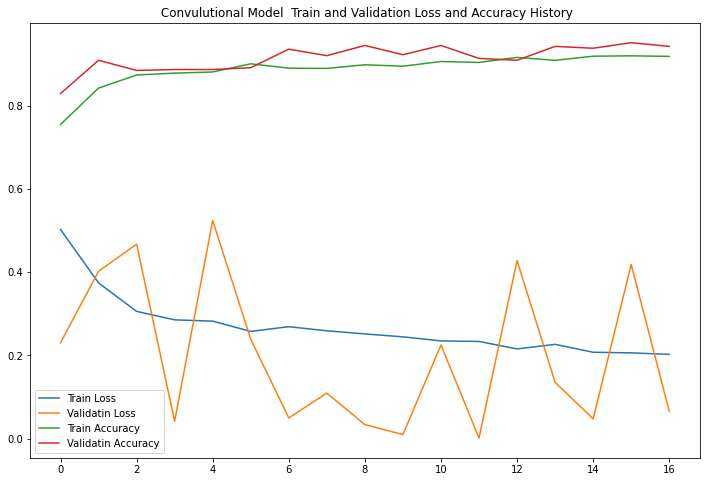

In [ ]:
print("Train Accuracy:{:.3f}".format(model_history.history['accuracy'][-1]))
print("Validation Accuracy:{:.3f}".format(model_history.history['val_accuracy'][-1]))
show_model_history(modelHistory=model_history, model_name="")

# Check the validation accuracy

This is the original validation_data while during model training the data we use is Augmented dataset. This data is very similar to the test data so it give us better picture about how our model is doing.

In [ ]:
validation_acc=model.evaluate(x_valid_norm,y_valid)
print(validation_acc)

396/396 [==============================] - 2s 4ms/step
[0.21133789152960586, 0.9217171669006348]


In [ ]:
# model.save('Transfer_learning_mobienet_Best_model_1_with_augmented_data save.h5')

In [ ]:
#The test data is normalised

predictions = model.predict(x_test_norm)
predictions = np.argmax(predictions, axis= 1)

In [ ]:
# y_maps = dict()
# y_maps = {v:k for k, v in Y_train.items()}
# pred_labels = [y_maps[k] for k in predictions]

In [ ]:
#Creating the submission file.
test['emergency_or_not']=pd.Series(predictions)
# sub.to_csv('submission.csv', index=False)
test.to_csv('submission56_aug.csv', index=False)